# Studying Student Diet, Performance, and Quality of Life

### Presented by  
* **Tejas Badadare** (A12753038)  
    Contributions: Data cleaning/preprocessing (eating habits DataFrame), data visualization (histograms, scatter plots), data analysis (corr-coeff heatmaps), discussion (annotating notebook), conclusion (takeaways and caveats)
* **Harsh Patel** (A12398402)  
    Contributions: Data Descriptions, overall strategy for approach to our question, creating SVM models for respective dataframes, and t-tests calculations / summary statistics, NLP integrations into dataframes
* **Kenil Vora** (A92124709)  
    Contributions:  Data cleaning/preprocessing (Food Perception), Data visualization and analysis (correlation coefficient heatmaps, pie charts), Count Vectorizers for SVM models
* **Fernando Schaeffer-Araujo** (A14233859)  
    Contributions: Data cleaning/preprocessing (Quality of Life), Data visualization (pie charts), Discussion, Ethics/Privacy, Conclusion

## Introduction and Background

### Question  
In what ways does a college student’s diet and perception of food inform their academic performance and general quality of life? Does one’s perception of food and a good diet change with that person’s academic performance in college? I.e. do higher performing students exhibit different attitudes towards food and diet?

### Hypothesis
We hypothesize that students who tend to favor healthier food choices will likely perform better than those who do not. Furthermore, we believe that those who self-report as happy, well-adjusted individuals will be more likely to have a healthier diet.  

### Background and Prior Work
This question is interesting because it applies directly to us as college students. By potentially identifying certain characteristics of diets that promote better living, we allow ourselves and others to make more informed choices about the food we eat. Prior work and studies that have examined the relation between a student’s academic performance and diet have generally noted that those with healthier diets and generally more active lifestyle perform well academically in comparison to their peers. The factor with most impact from those related to diet is having a healthy breakfast, it has consistently shown to boost mood. Research suggests that diets high in trans and saturated fats can negatively impact learning and memory. These nutritional deficiencies impact cognitive development especially in concentration and energy levels. Previous studies on college students have concluded that college students in general do not care about eating a daily breakfast and that their diets commonly consist of cheap and quick meals. These are all factors which contribute to weight gain and emotional strain. This is something that we will want to explore and verify with our data.

## Data Description (10%)

### Dataset
This brings us to the most important aspect of our data analysis: our data! 

In researching applicable datasets, we came across the very interesting ["Food Choices" dataset on Kaggle](https://www.kaggle.com/borapajo/food-choices/data). This is a survey of college students on their perception of food, their current diet and lifestyle, and other miscellaneous qualities about their life and that of their parents. There are many features in this datatset (61 columns!). It is a rather small dataset, with only ~200 raw rows of data, but in conjunction with the very large feature space, we anticipate that there is enough information here to extract a meaningful analysis. This dataset was chosen with Prof. Voytek's approval! :)

### Column Description
For descriptions of all of the column values, please see the following table. These descriptions were taken from the document provided with the dataset that explains the columns in detail. You can check this file in the current directory for further column documentation: `food_dataset_columns.docx`.

In [1]:
from food_col_desc import column_desc; import pandas as pd; 
with pd.option_context('display.max_rows', None): 
    display(column_desc.style.set_table_styles([{"selector":"td", "props":[{"max-width", "2000px"}]}]))

,Column,Description
0,GPA,Numerical GPA
1,Gender,"1 - Female, 2 - Male"
2,breakfast,"Percep. of breakfast: 1 - Cereal, 2 - Donut"
3,calories_chicken,Guessing calories in chicken piadina
4,calories_day,"Importance of consuming calories per day: 1 - I dont know, 2 - Not important, 3 - Moderately important, 4 - Very important"
5,calories_scone,Guessing calories in a scone from Starbucks
6,coffee,"Percep. of coffee: 1 - Frappuccino, 2 - Espresso"
7,comfort_food,List 3-5 comfort foods that come to mind.
8,comfort_food_reasons,What are some of the reasons that you eat comfort food?
9,comfort_food_reasons_coded,"Comfort food reasons coded: 1 - Stress, 2 - Boredom, 3 - Depression/sadness, 4 - Hunger, 5 - Laziness, 6 - Cold weather, 7 - Happiness, 8 - Watching TV, 9 - None"


### Overall Strategy
Overall, to get a better understanding of our data and perform the appropriate kind of analysis, we first determined which columns were most necessary. Our basic strategy consisted of creating seperate dataframes which tackle each aspect of our problem. Since our dataset is very feature rich, we determined which columns were useful and eliminated those that we felt were not useful to our problem. Certain columns that we decided were not important for our question include favorite cuisines, grade level, the types of sports played, etc. 


Our dataset even with removed columns is still very feature rich, so in order to make the best use of this we determined how we want to represent our data. To best answer our questions we took a look at a college student's diet, perception of food, academic performance, and quality of life. Thus, we chose to apply our cleaning, visualization, and analysis to three main dataframes constructed from the original data:
1. **Eating habits**  
    (Diet, Frequency of eating out, Cooking frequency, Happiness, etc)
2. **Food perception**  
    (Guessing calorie counts, food preferences in pictures)
3. **Quality of life**  
    (Parental education, income levels, exercise, nationality, etc)

Amongst all of our dataframes we wanted to keep GPA and weight as that is a focal point to our question. Thus, each of the aforementioned dataframes include `weight` and `GPA` columns. With the eating habits dataframe we are examining a student's eating habits in particular, what kinds of food they are consuming, how often they are eating out and how often they are eating types of food. In our food perception dataframe, we are determining a student's overall perception on food with regards to how they view certain types of food, drinks, and what they find to be healthy. In the quality of life dataframe, we are determining a college students overall quality of life and this is based upon employment, exercise, sports, father's and mother's income level, and most importantly, their self perceived weight and happiness.  


We believe that these dataframes will help towards answering our questions and gives us a better idea about a college student's overall diet and its overall effect on perception of life. The conclusions we will be able to draw from these dataframes should allow us to come to an insightful conclusion regarding a college student's academic performance and quality of life.

## Data Cleaning/Pre-Processing

Import data repr/analysis modules (numpy, pandas, matplotlib), stat/viz modules (patsy, scipy, seaborn), and NLP/ML modules (nltk, sklearn)

In [2]:
# Imports
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
from seaborn import heatmap, axes_style, diverging_palette
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Import nltk package 
#   PennTreeBank word tokenizer 
#   English language stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# scikit-learn imports
#   SVM (Support Vector Machine) classifer 
#   Vectorizer, which that transforms text data into bag-of-words feature
#   TF-IDF Vectorizer that first removes widely used words in the dataset and then transforms test data
#   Metrics functions to evaluate performance


from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

Create a main dataframe from the raw CSV.

In [3]:
# Load csv into pandas
main = pd.read_csv('food_dataset.csv')

Create the **Eating Habits** sub-DataFrame! Contains only the columns from the main dataset relating to one's diet and food preferences, as detailed in the Overall Strategy section.

In [4]:
### EATING HABITS (Diet, Frequency of eating out, Cooking frequency, Happiness, etc)
# GPA, weight, cook, cuisine, diet_current_coded, eating_out, fav_food, 
# fruit_day, veggies_day, vitamins, greek_food, indian_food, persian_food, thai_food

eatingHabitsCols = ["GPA", "weight", "life_rewarding", "cook", "cuisine", "diet_current_coded", "eating_out",
                    "fav_food", "fruit_day", "veggies_day", "vitamins", "greek_food", "indian_food", 
                    "persian_food", "thai_food"]
eatingHabitsDF = main.loc[:, eatingHabitsCols]

Next we normalize the Eating Habits dataframe numerical values. Many columns have numerical values that are currently represented as strings.  
This is because, for example, people may report their weights as "250" or "250 pounds" or "250 lbs." This process helps convert all of these representations to a `250.0` float value.

In [5]:
# Convert the input string to a float. 
# If not a float, tries to extract the first int found in the string.
# If not possible, returns np.nan
def extractFloat(s_in):
    try: return float(s_in)
    except: pass
    
    for s in s_in.split():
        try: return float(s)
        except: pass
    
    return np.nan

# Convert all values to floats
for col in eatingHabitsCols:
    eatingHabitsDF.loc[:, col] = eatingHabitsDF[col].apply(extractFloat)

Now we must remove rows with invalid values. We chose to simply remove NaN and invalid rows rather than fill values with averaged or polynomially estimated values. This is because a large amount of our dataset consists of discrete answers to multiple-choice questions. Thus, replacing a NaN with an average value of, say, 3.3, wouldn't make sense when the multiple-choice question is expecting discrete answers in the set `{1, 2, 3, 4, 5}`.  

We chose to drop the rows where there are NaNs in GPA and weight. These are the some of the most important columns to our central question. Because the dataset has so many columns, removing NaNs rows across all columns would leave us with a prohibitively small dataset. Thus, we do not drop NaN rows in columns outside of GPA and weight, and chose instead to interpolate those values (where the question isn't multiple-choice as described above.)

In [6]:
# Only drop rows where there are NaNs in GPA and weight. 
# The rest of the columns are less essential, and we can interpolate the missing values.
rowsToDrop = eatingHabitsDF[eatingHabitsDF[['GPA', 'weight']].isnull().any(axis=1)]
print("%d rows will be dropped."%(len(rowsToDrop)))

# Drop the rows
EH_df = eatingHabitsDF.drop(rowsToDrop.index.values)

7 rows will be dropped.


Let's preview the cleaned and ready-to-go Eating Habits dataframe!

In [7]:
# Preview the clean eating habits dataframe, EH_df
EH_df

,GPA,weight,life_rewarding,cook,cuisine,diet_current_coded,eating_out,fav_food,fruit_day,veggies_day,vitamins,greek_food,indian_food,persian_food,thai_food
0,2.400,187.0,1.0,2.0,NaN,1.0,3.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,1.0
1,3.654,155.0,1.0,3.0,1.0,2.0,2.0,1.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0
3,3.200,240.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,3.0,1.0,5.0,5.0,5.0,5.0
4,3.500,190.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,4.0,2.0,4.0,2.0,2.0,4.0
5,2.250,190.0,4.0,3.0,NaN,2.0,1.0,3.0,2.0,1.0,2.0,2.0,5.0,5.0,4.0
6,3.800,180.0,8.0,2.0,1.0,3.0,2.0,1.0,4.0,4.0,1.0,5.0,5.0,5.0,5.0
7,3.300,137.0,3.0,3.0,1.0,1.0,2.0,1.0,5.0,4.0,2.0,3.0,1.0,1.0,1.0
8,3.300,180.0,8.0,3.0,1.0,1.0,5.0,3.0,4.0,3.0,2.0,5.0,5.0,5.0,5.0
9,3.300,125.0,3.0,3.0,1.0,1.0,3.0,1.0,5.0,5.0,1.0,5.0,4.0,4.0,4.0
10,3.500,116.0,8.0,1.0,1.0,1.0,2.0,1.0,5.0,5.0,2.0,1.0,1.0,2.0,2.0


Moving on, now we create the **Quality of Life** (QofL) sub-DataFrame! Contains only the columns from the main dataset relating to one's life characteristics, as detailed in the Overall Strategy section.

In [8]:
### QofL (Parental education, income levels, exercise, nationality, etc)
# GPA, weight, employment, exercise, sports, father_education, father_profession (NLP), 
# mothers_profession (NLP), mothers_education, healthy_feel, income, life_rewarding, 
# self_perception_weight, 

# extract the columns that relate to quality of life to a new dataframe

qoflCols = ["GPA", "weight", "life_rewarding", "employment", "exercise", "sports", "father_education", "father_profession",
                    "mother_education", "mother_profession", "healthy_feeling", "income", "self_perception_weight"]

qoflDF = main.loc[:, qoflCols]

For the Quality of Life dataframe, we must also coerce all numerical values to float.  

In [9]:
# We need to clean up the following categories:
#  1 - we standardize every numerical input to floats
#  2 - weight, standardize [father,mother]_profession

# 1 - convert numerical input to floats
text_columns = ["father_profession", "mother_profession"]

# 1.1 - apply our conversion to each numerical column
for col in list(qoflCols):
    if col not in text_columns:
        qoflDF[col] = qoflDF[col].apply(extractFloat)

This dataframe contains two interesting colums: **father profession and mother profession.**  
These are difficult columns to analyze because of the vast variety of responses (and the vast variety of the _format_ of the responses.) In the raw dataset, there are nearly as many unique responses to these questions as there are rows in the entire set!  
Thus, we must normalize/standardize these values to unify duplicate values, throw out unusable values, and represent the responses in a way that is quantifiable by our models.  

To accomplish this, we check the suffixes of the responses and match them with the most popular professions that we observed in the dataset.

In [10]:
# We need to clean up the following categories:
#  1 - we standardize every numerical input to floats
#  2 - weight, standardize [father,mother]_profession

# 2 (pre-processing) - let us check how many unique entries we have on each column
print ("before standardization:\tfather_profession uniques: %d, mother_profession uniques: %d"
       %(qoflDF.father_profession.nunique() , qoflDF.mother_profession.nunique()))

# helper function to check if string ends in suffix list
def checkEnds(string, ends):
    words = string.split()
    
    for word in words:
        if any(word.endswith(end) for end in ends):
            return True, word
    
    return False, string

# 2 - standardize profession
def standardize_profession (string):
    
    string = string.lower()
    string = string.strip()
    
    endsw, word = checkEnds(string, ["er", "or", "ic", "st", "ct", "nt", "an", "ch"])
    
    if any(x for x in ["own", "self", "business"] if x in string):
        output = "BUSINESSMAN"
    elif any(x for x in ["teacher", "prof"] if x in string):
        output = "TEACHER"
    elif "home" in string:
        output = "HOMEMAKER"
    elif "construct" in string:
        output = "CONSTRUCTION"
    elif "police" in string:
        output = "POLICEMAN"
    elif endsw == True:
        output = word.upper()
    elif "sales" in string:
        output = "SALESMAN"
    elif "retired" in string:
        output = "RETIRED"
    elif any(x for x in ["ceo", "cfo", "vp", "president", "cto"] if x in string):
        output = "EXECUTIVE"
    else:
        output = "OTHER"
        
    return output

# finally drop nan by replacing with empty strings
qoflDF["father_profession"] = qoflDF["father_profession"].fillna("")
qoflDF["mother_profession"] = qoflDF["mother_profession"].fillna("")

# apply our filter to standardize the profession columns
qoflDF["father_profession"] = qoflDF["father_profession"].apply(standardize_profession)
qoflDF["mother_profession"] = qoflDF["mother_profession"].apply(standardize_profession)

# print new unique counts
print ("after standardization:\tfather_profession uniques: %d, mother_profession uniques: %d"
       %(qoflDF.father_profession.nunique() , qoflDF.mother_profession.nunique()))

before standardization:	father_profession uniques: 114, mother_profession uniques: 112
after standardization:	father_profession uniques: 49, mother_profession uniques: 51


This deduplication and standardization brings us down to ~50 unique professions across all rows. Much more manageable.   
Next, we remove NaNs-valued rows across GPA and weight columns, as we did before.

In [11]:
# Only drop rows where there are NaNs in GPA and weight. 
# The rest of the columns are less essential, and we can interpolate the missing values.
rowsToDrop = qoflDF[qoflDF[['GPA', 'weight']].isnull().any(axis=1)]
print("%d rows will be dropped."%(len(rowsToDrop)))

# Drop the rows
QOFL_df = qoflDF.drop(rowsToDrop.index.values)

# Preview the clean quality of life dataframe, QOFL_df
QOFL_df

7 rows will be dropped.


,GPA,weight,life_rewarding,employment,exercise,sports,father_education,father_profession,mother_education,mother_profession,healthy_feeling,income,self_perception_weight
0,2.400,187.0,1.0,3.0,1.0,1.0,5.0,TEACHER,1.0,OTHER,2.0,5.0,3.0
1,3.654,155.0,1.0,2.0,1.0,1.0,2.0,BUSINESSMAN,4.0,OTHER,5.0,4.0,3.0
3,3.200,240.0,2.0,3.0,3.0,2.0,2.0,MECHANIC,4.0,TEACHER,7.0,6.0,5.0
4,3.500,190.0,1.0,2.0,1.0,1.0,4.0,OTHER,5.0,CONSELOR,6.0,6.0,4.0
5,2.250,190.0,4.0,3.0,2.0,2.0,1.0,DRIVER,1.0,BRAIDER,4.0,1.0,5.0
6,3.800,180.0,8.0,3.0,1.0,1.0,4.0,ASSEMBLER,4.0,JOURNALIST,4.0,4.0,4.0
7,3.300,137.0,3.0,2.0,2.0,2.0,3.0,BUSINESSMAN,2.0,OTHER,3.0,5.0,3.0
8,3.300,180.0,8.0,2.0,NaN,2.0,5.0,OTHER,5.0,TEACHER,7.0,5.0,4.0
9,3.300,125.0,3.0,3.0,1.0,1.0,5.0,COMMISSIONER,5.0,OTHER,3.0,4.0,3.0
10,3.500,116.0,8.0,1.0,1.0,1.0,2.0,OTHER,4.0,OTHER,9.0,3.0,1.0


In [12]:
### FOOD PERCEPTION (Guessing calorie counts, food preferences (pictures))
# GPA, weight, breakfast, calories_chicken, calories_day, calories_scone, 
# coffee, drink, fries, healthy_meal (NLP), nutritional_check, soup, tortilla_calories, 
# turkey_calories, waffle_calories

food_perception_cols = ["GPA", "weight", "breakfast", "calories_chicken", "calories_day", 
                        "calories_scone", "coffee", "drink", "fries", "healthy_meal", 
                        "nutritional_check","soup", "tortilla_calories", "turkey_calories", "waffle_calories"]

food_perception_DF = main.loc[:, food_perception_cols]
food_perception_DF

,GPA,weight,breakfast,calories_chicken,calories_day,calories_scone,coffee,drink,fries,healthy_meal,nutritional_check,soup,tortilla_calories,turkey_calories,waffle_calories
0,2.4,187,1,430,NaN,315.0,1,1.0,2,looks not oily,5,1.0,1165.0,345,1315
1,3.654,155,1,610,3.0,420.0,2,2.0,1,"Grains, Veggies, (more of grains and veggies),...",4,1.0,725.0,690,900
2,3.3,I'm not answering this.,1,720,4.0,420.0,2,1.0,1,usually includes natural ingredients; nonproce...,4,1.0,1165.0,500,900
3,3.2,"Not sure, 240",1,430,3.0,420.0,2,2.0,2,"Fresh fruits& vegetables, organic meats",2,1.0,725.0,690,1315
4,3.5,190,1,720,2.0,420.0,2,2.0,1,"A lean protein such as grilled chicken, green ...",3,1.0,940.0,500,760
5,2.25,190,1,610,3.0,980.0,2,2.0,1,"Requires veggies, fruits and a cooked meal.",1,1.0,940.0,345,1315
6,3.8,180,1,610,3.0,420.0,2,1.0,1,"Protein, vegetables, fruit, and some carbs",4,1.0,940.0,690,1315
7,3.3,137,1,720,3.0,420.0,1,2.0,1,A healthy meal has a piece of meat followed by...,4,1.0,725.0,500,1315
8,3.3,180,1,430,NaN,420.0,1,1.0,1,Colorful,2,2.0,725.0,345,760
9,3.3,125,1,430,3.0,315.0,2,1.0,1,Chicken and rice with a side of veggies.,5,1.0,580.0,345,900


In [13]:
rows_to_drop = food_perception_DF[food_perception_DF[['GPA', 'weight', 'calories_day']].isnull().any(axis=1)]
print("%d rows will be dropped."%(len(rows_to_drop)))

# Drop the rows
FP_df = food_perception_DF.drop(rows_to_drop.index.values)

# convert numerical input to floats
text_columns = ["healthy_meal"]

# apply our conversion to each numerical column
for col in FP_df:
    if col not in text_columns:
        FP_df[col] = FP_df[col].apply(extractFloat)

22 rows will be dropped.


In [14]:
FP_df

,GPA,weight,breakfast,calories_chicken,calories_day,calories_scone,coffee,drink,fries,healthy_meal,nutritional_check,soup,tortilla_calories,turkey_calories,waffle_calories
1,3.654,155.0,1.0,610.0,3.0,420.0,2.0,2.0,1.0,"Grains, Veggies, (more of grains and veggies),...",4.0,1.0,725.0,690.0,900.0
2,3.300,NaN,1.0,720.0,4.0,420.0,2.0,1.0,1.0,usually includes natural ingredients; nonproce...,4.0,1.0,1165.0,500.0,900.0
3,3.200,240.0,1.0,430.0,3.0,420.0,2.0,2.0,2.0,"Fresh fruits& vegetables, organic meats",2.0,1.0,725.0,690.0,1315.0
4,3.500,190.0,1.0,720.0,2.0,420.0,2.0,2.0,1.0,"A lean protein such as grilled chicken, green ...",3.0,1.0,940.0,500.0,760.0
5,2.250,190.0,1.0,610.0,3.0,980.0,2.0,2.0,1.0,"Requires veggies, fruits and a cooked meal.",1.0,1.0,940.0,345.0,1315.0
6,3.800,180.0,1.0,610.0,3.0,420.0,2.0,1.0,1.0,"Protein, vegetables, fruit, and some carbs",4.0,1.0,940.0,690.0,1315.0
7,3.300,137.0,1.0,720.0,3.0,420.0,1.0,2.0,1.0,A healthy meal has a piece of meat followed by...,4.0,1.0,725.0,500.0,1315.0
9,3.300,125.0,1.0,430.0,3.0,315.0,2.0,1.0,1.0,Chicken and rice with a side of veggies.,5.0,1.0,580.0,345.0,900.0
10,3.500,116.0,1.0,610.0,3.0,980.0,2.0,2.0,1.0,"Chicken, and veggies",2.0,1.0,940.0,345.0,900.0
11,3.904,110.0,1.0,720.0,4.0,420.0,2.0,1.0,1.0,"lean protein, veggies, fruit, complex carbs",5.0,1.0,940.0,500.0,900.0


## Data Visualization (15%)

To better understand our data, let's plot histograms and a scatter matrix of our most important variables:   
* GPA
* weight   
* life_rewarding ("How rewarding is your life from 1-10?")
* healthy_feeling ("How healthy do you feel from 1-10?")

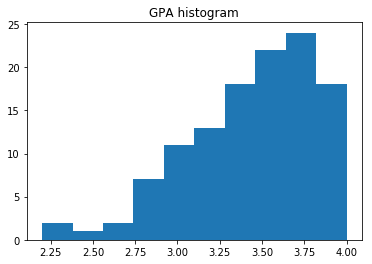

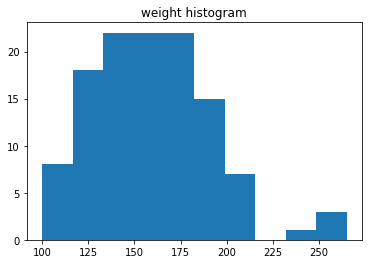

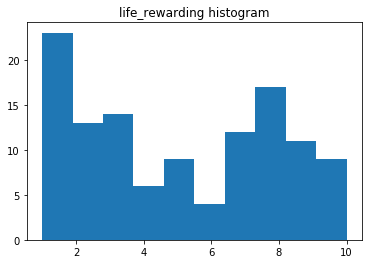

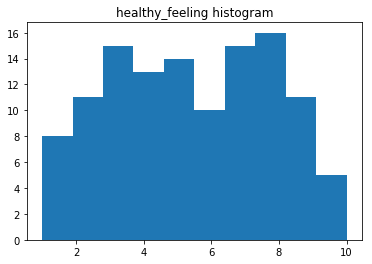

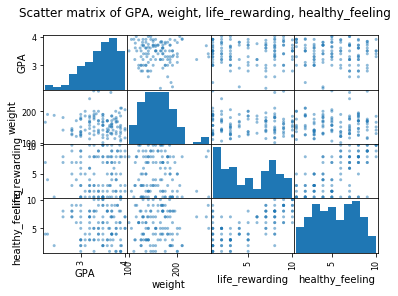

In [15]:
cols_to_visualize = ["GPA", "weight", "life_rewarding", "healthy_feeling"]

# Plot histograms
for col in cols_to_visualize:
    plt.title(col + " histogram")
    plt.hist(QOFL_df[col])
    plt.show()

# Plot scatter matrix
pd.plotting.scatter_matrix(QOFL_df[cols_to_visualize])
plt.suptitle("Scatter matrix of " + ', '.join(cols_to_visualize))
plt.show()

These histograms and scatter plots are very revealing! Let's break them down by the variable being examined.
* **GPA**: This variable is quite far from following a normal distribution. Most students' GPA is greater than 3.50. The 50% percentile for GPA is 3.50. This variable seems to be close to a triangle distribution, with harsh negative skew (values falling off the to left).
* **Weight**: This variable very much resembles a normal distribution, except for a few outliers. This is not to say that the outliers are unusable data, as the presence of high weight values is important to potentially establish a relationship with other values such as GPA. It seems worthwhile to run a statistical test to validate whether or not this variable follows a normal distribution.
* **life_rewarding**: The histogram for this variable reveals a quite stark bi-modal distribution. This is representative of the fact that most people's responses to this question are likely influenced by their mood in the moment of answering the question. Thus, we see very high representation for low values ("my life sucks") and high representation for high values ("my life is pretty good!"), with a few responses in the middle.
* **healthy_feeling**: Here we see another bi-modal distribution, but much less distinct than that of life_rewarding. Interestingly, many people don't hold "average" sentiments about their body and their weight, but rather weighty positive or negative sentiments. We see many high-valued responses and well as low-valued responses. It will be interesting to see if this corresponds to the life_rewarding distribution: are those that feel healthy also those that consider their life rewarding?

The scatter plot also shows some preliminary relationships between the variables. Most of the data is rather evenly spread, but we can see clear clustering with GPA vs Weight, potentially indicating that a lower weight is associated with a higher GPA. There is also a subtle linear relationship between life_rewarding and healthy_feeling, perhaps indicating that self-fullfillment is tied to satisfactory health.

<h3>Additional Data Visualization</h3>
<p>In addition to the main variables of interest for our research, we can also visualize other variables which might correlate with healthy living and GPA. We list those variables in this section.</p>
<hr/>

<h4>Quality of Life Indicators</h4>

We will plot the following variables, which relate to overall quality of life of our student population:
<ul>
    <li>sports</li>
    <li>exercise</li>
    <li>self_perception_weight</li>
</ul>

In [16]:
# First, let's clean the data. We will change the sports column responses to 1: YES, 0: NO.
def clean_sports(num):
    if num == 2.0:
        return 0.0
    
    return num

# Process columns of interest
cols = ["GPA", "weight", "exercise", "sports", "self_perception_weight"]
df = QOFL_df.copy()
df = df[cols]
df["sports"] = df["sports"].apply(clean_sports).dropna().astype(int)
sports_frame = df.sports.value_counts().to_frame()
sports_frame.reset_index(inplace=True)
sports_frame["index"] = ("Yes", "No")
sports_frame = sports_frame.set_index("index")

# place people in GPA bins, grab the mean of every column
# except for "sports" - we will grab the sum, which will show how many people in that group practice some sports
# finally we will add a count column to see how many people are in each group
bins = [0, 2.5, 3.0, 3.5, 3.75, 4.0]
df["gpa_range"] = pd.cut(df.GPA, bins)
g = df.groupby("gpa_range").mean()
display(g)
g["sports"] = df.groupby("gpa_range").sum().sports.astype(int)
g["count"] = df.groupby("gpa_range").size()
g["no_sports"] = g["count"] - g["sports"]
g = g[["GPA", "count", "sports", "no_sports", "exercise", "weight", "self_perception_weight"]]

,GPA,weight,exercise,sports,self_perception_weight
gpa_range,,,,,
"(0.0, 2.5]",2.283333,180.666667,1.666667,0.500000,4.000000
"(2.5, 3.0]",2.900000,146.300000,1.526316,0.631579,2.750000
"(3.0, 3.5]",3.341864,167.204545,1.725000,0.613636,3.186047
"(3.5, 3.75]",3.662760,155.240000,1.523810,0.720000,3.000000
"(3.75, 4.0]",3.876385,155.192308,1.458333,0.576923,3.153846


<p>After cleaning up our data, we now have some easy to read data that we can visualize in pie charts. First, we will see the percentage of people who play sports or not. Then, we will see in what GPA range the people who play sports are located. We will use ranges described below:</p>
<ul>
    <li>(0 - 2.5]</li>
    <li>(2.5 - 3.0]</li>
    <li>(3.0 - 3.5]</li>
    <li>(3.5 - 3.75]</li>
    <li>(3.75 - 4.0]</li>
</ul>
<p>We will, similarly, visualize the GPA range of who does not play sports.

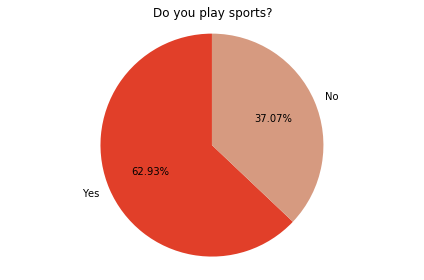

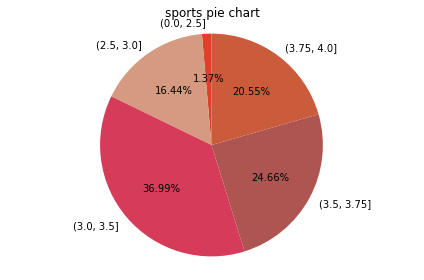

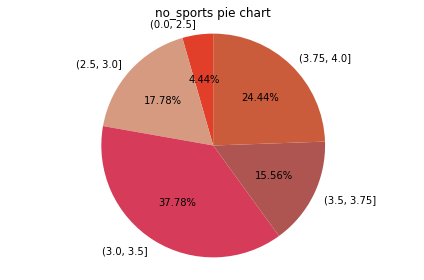

In [17]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

pies = ["sports", "no_sports"]

# Plot Pie chart of sports column
plt.title("Do you play sports?")
plt.pie(sports_frame, labels=list(sports_frame.index), shadow=False, colors=colors, startangle=90, autopct='%.2f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Plot Additional Pie Charts
for col in pies:
    plt.title(col + " pie chart")
    # Create a pie chart
    plt.pie(g[col], labels=list(g.index), shadow=False, colors=colors, startangle=90, autopct='%.2f%%')

    # View the plot drop above
    plt.axis('equal')

    # View the plot
    plt.tight_layout()
    plt.show()

In most cases, there is more people that do not practice any sports than people who do - within a certain GPA range. Interestingly, that is not the case for people within a high GPA range of 3.5 - 3.75.

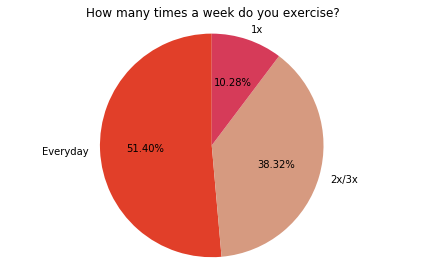

In [18]:
exercise_frame = df.exercise.value_counts().to_frame()
exercise_frame.reset_index(inplace=True)
exercise_frame["index"] = ("Everyday", "2x/3x", "1x")
exercise_frame = exercise_frame.set_index("index")

# Plot Pie chart of exercise column
plt.title("How many times a week do you exercise?")
plt.pie(exercise_frame, labels=list(exercise_frame.index), shadow=False, colors=colors, startangle=90, autopct='%.2f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

Again, it seems like most people stated that they routinely exercise. The vast majority said they exercise every day, while there were no responses stating that they exercised "sometimes" or "never".

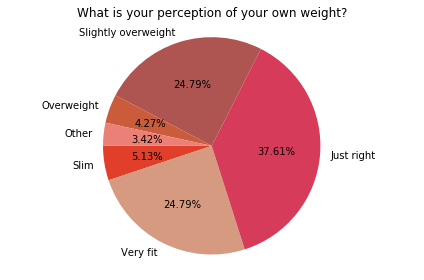

In [19]:
perception_frame = df.self_perception_weight.value_counts().to_frame()
perception_frame.reset_index(inplace=True)
perception_frame = perception_frame.sort_values(by=["index"])
perception_frame["index"] = ("Slim", "Very fit", "Just right", "Slightly overweight", "Overweight", "Other")
perception_frame = perception_frame.set_index("index")

# Plot Pie chart of exercise column
plt.title("What is your perception of your own weight?")
plt.pie(perception_frame, labels=list(perception_frame.index), shadow=False, colors=colors, startangle=180, autopct='%.2f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

Lastly, we analyze information regarding self perception of weight. Most people believe they are fit or just right. The low overweight response shows that most people feel good about their own weight.

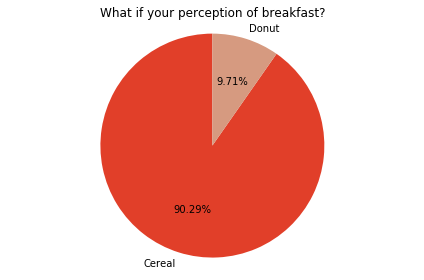

In [20]:
def clean_breakfast(num):
    if num == 2.0:
        return 0.0
    
    return num

cols = ["GPA", "weight", "breakfast"]
df = FP_df.copy()
df = df[cols]
df["breakfast"] = df["breakfast"].apply(clean_breakfast)
breakfast_frame = df.breakfast.value_counts().to_frame()
breakfast_frame.reset_index(inplace=True)
breakfast_frame["index"] = ("Cereal", "Donut")
breakfast_frame = breakfast_frame.set_index("index")
plt.title("What if your perception of breakfast?")
plt.pie(breakfast_frame, labels=list(breakfast_frame.index), shadow=False, colors=colors, startangle=90, autopct='%.2f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

Most students are inclined to have cereal for breakfast over donuts. While this may sound obvious that donuts are not healthy choices for breakfast some students are still disposed to consume donuts for breakfast and we can reasonable infer that most students opt for the healthier choice and hence they are making thoughtful dietary choices.


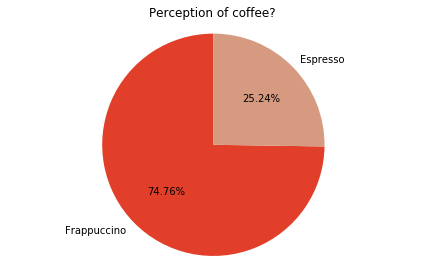

In [21]:
def clean_coffee(num):
    if num == 2.0:
        return 0.0
    
    return num

cols = ["GPA", "weight", "coffee"]
df = FP_df.copy()
df = df[cols]
df["coffee"] = df["coffee"].apply(clean_coffee)
coffee_frame = df.coffee.value_counts().to_frame()
coffee_frame.reset_index(inplace=True)
coffee_frame["index"] = ("Frappuccino", "Espresso")
coffee_frame = coffee_frame.set_index("index")
plt.title("Perception of coffee?")
plt.pie(coffee_frame, labels=list(coffee_frame.index), shadow=False, colors=colors, startangle=90, autopct='%.2f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

The above pi-chart shows how the vast majority of students prefer/visualize a frappuccino rather than an espresso. Since frappuccinos are genereally thought of to be drinks loaded with sugars and whipped cream they are usually unhealthier choices thathealth conscious students would not prefer on a regular basis.


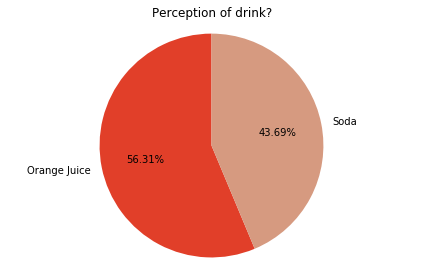

In [22]:
def clean_drinks(num):
    if num == 2.0:
        return 0.0
    
    return num

cols = ["GPA", "weight", "drink"]
df = FP_df.copy()
df = df[cols]
df = df.fillna(0)
df["drink"] = df["drink"].apply(clean_drinks)
drinks_frame = df.drink.value_counts().to_frame()
drinks_frame.reset_index(inplace=True)
drinks_frame["index"] = ("Orange Juice", "Soda")
drinks_frame = drinks_frame.set_index("index")
plt.title("Perception of drink?")
plt.pie(drinks_frame, labels=list(drinks_frame.index), shadow=False, colors=colors, startangle=90, autopct='%.2f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

We can infer that the majority of the studets do believe that Orange Juice is obviously the better choice when they are considering picking a drink. This could potentially arise out of financial reasons since a large group of people do reach out for a cold soda rather than orange juice when given the choice.


## Data Analysis and Results

### Summary Statistics
To start off our analysis, let's check the summary statistics on our columns across our three main dataframes.

In [23]:
# View summary statistics 
desc_ql = QOFL_df.describe(); desc_ql

,GPA,weight,life_rewarding,employment,exercise,sports,father_education,mother_education,healthy_feeling,income,self_perception_weight
count,118.000000,118.000000,118.000000,109.000000,107.000000,116.000000,117.000000,115.000000,118.000000,118.000000,117.00000
mean,3.425822,158.822034,5.025424,2.440367,1.588785,1.370690,3.487179,3.426087,5.415254,4.533898,3.08547
std,0.389270,31.904674,3.139116,0.534568,0.672271,0.485085,1.178949,1.155163,2.606128,1.477363,1.08733
min,2.200000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,3.200000,135.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,4.000000,2.00000
50%,3.500000,155.000000,5.000000,2.000000,1.000000,1.000000,4.000000,4.000000,5.000000,5.000000,3.00000
75%,3.700000,180.000000,8.000000,3.000000,2.000000,2.000000,4.000000,4.000000,8.000000,6.000000,4.00000
max,4.000000,265.000000,10.000000,3.000000,3.000000,2.000000,5.000000,5.000000,10.000000,6.000000,6.00000


Here we find that median (50th percentile) is quite high at 3.5. This reaffirms our visual diagnosis above, in the visualization step.  
The summary statistics for life_rewarding are especially interesting, with 25% percentile, 50% percentile, and 75 percentile falling at 2, 5, 8 respectively. The mean is very close to the median as well, at 5.023. Just from the summary statistics, it might seem safe to rule it a uniform or normal distribution. However, as we saw in the visualization step, there is an equally heavy preference for low and high values, with relatively few survey-takers answering the median answer of 5.  
Weight seems to be the only major variable that we are examining that falls on what appears to be a normal distribution. We can see that the 25h percentile is slightly greater than the median less 1 stddev, and that the 75th percentile is slightly lesser than the median plus 1 stddev, which is in line with a normal bell-shaped curve.

### Finding Correlations
To find relationships between our variables, we can use the Pearson correlation coefficient statisical test pairwise on the relevant columns. In the following cell, we calculate each Pearson corrcoeff for the pairwise relationships and display them in a heatmap with a color palette centered at 0.0. This means that the redder the value, the more positive the correlation, and the bluer the value the more negative the correlation. The less saturated the color, the closer the correlation coefficient is to the center (0), indicating a weaker correlation.

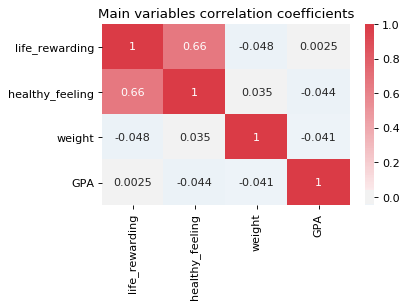

In [24]:
# Store figs for garbage collection later
corr_figs = []

# Plot corr coeff heatmap for just our main variables
main_corrs = QOFL_df[['life_rewarding', 'healthy_feeling', 'weight', 'GPA']].corr()
corr_figs.append(plt.figure(figsize=(5, 3), dpi=80))
plt.title("Main variables correlation coefficients")
heatmap(
    main_corrs,
    center=0.0,
    cmap=diverging_palette(240, 10, as_cmap=True),
    annot=True)
plt.show()

Calculating correlation coefficients across our main variables shows us some interesting relationships!  

`life_rewarding` versus `healthy_feeling`
* We can immediately identify bright red squares at the intersection of life_rewarding and healthy_feeling. 0.66 is quite a high corr-coeff value, and shows that there exists a strong positive linear correlation between life_rewarding and healthy_feeling. Thus, a high sense of fullfillment is indicative of feeling healthy! This is just a correlation though, and we aren't equipped to assert that feeling healthy (ergo, being healthy) _causes_ a fullfilling life, or that a fullfilling life _is a driver of_ feeling good about one's health. However, with such a strong correlation, we can establish that those who are happy with their bodies and their health tend to also happy with their life at large.  

The rest of our variables turn out to be very much unrelated, with correlation coefficient values so close to zero. This in and of itself is a significant result, however, and is something we'll inspect in the Conclusion and Discussion section coming up.

Let's plot correlation coefficients for our three main DataFrames.

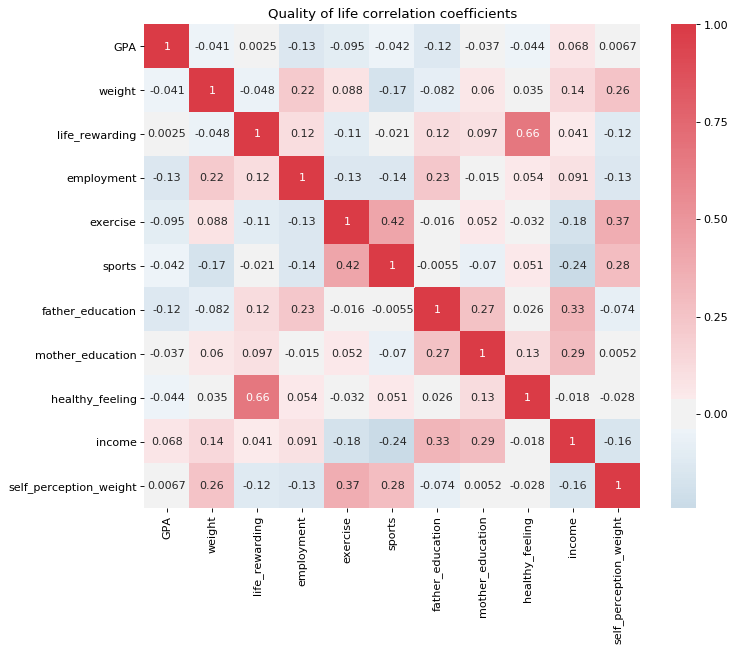

In [25]:
# Plot corr coeff heatmap for QOFL
ql_corrs = QOFL_df.corr()
corr_figs.append(plt.figure(figsize=(10, 8), dpi=80))
plt.title("Quality of life correlation coefficients")
heatmap(
    ql_corrs,
    center=0.0,
    cmap=diverging_palette(240, 10, as_cmap=True),
    annot=True)
plt.show()

Again we witness some interesting relationships! Let's break them down by pairwise variable.

* `self_perception_weight` versus `exercise`  
As plotted above, self_perception_weight has a relatively positive linear correlation with exercise with a corr-coeff value of 0.37.  
Recall, self_perception_weight asks "How do you perceive your weight?" on a scale from 1 to 5, where 1 indicates "very slim" and 5 indicates "obese."  
On the other hand, exercise asks "How often do you exercise in a regular week?" on a scale from 1 to 5, where 1 indicates "everyday" and 5 indicates "never."  
Our discovered positive correlation indicates that high self_perception_weight values are often observed with high exercise values. This means that those that percieve themselves as overweight happen to be those that rarely exercise. This relationship is in line with conventional wisdom surrounding exercise and weight. The same relationship is seen between self_perception_weight and sports, which is more or less leads to the same discovery.



* `income` versus `father_education`/`mother_education`  
We can see that student income has a relatively positive linear correlation with parental education level (corr-coeff of 0.33 for father_education and 0.29 for mother_education).  
This is rather interesting, as it suggests that the longer _your parents_ went to school, the more money _you_ earn. This is perhaps a byproduct of familial influence and parental income level. It may suggest that families where the parents have more money are, on balance, more likely to set their children up for financial success. Interestingly, income seems to have little to no bearing on GPA, which is perhaps representative of the fact that those that are being surveyed are students, and as such, the jobs in question are likely part-time and temporary. This would suggest that those that holding a job doesn't preclude one from performing at school. This is backup up by the near-zero correlation coefficient between employment ("Do you have a job?") and GPA: there exists no such significant correlation.

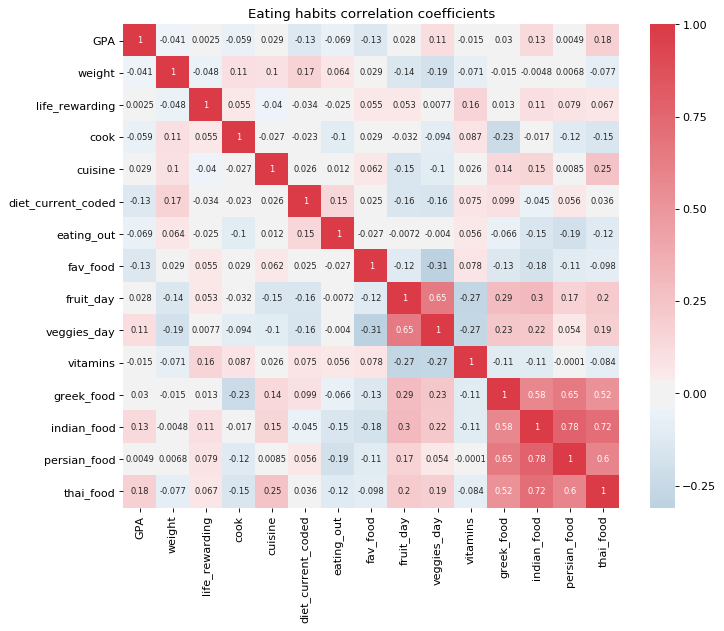

In [26]:
# Plot corr coeff heatmap for EH
EH_corrs = EH_df.corr()
corr_figs.append(plt.figure(figsize=(10, 8), dpi=80))
plt.title("Eating habits correlation coefficients")
heatmap(
    EH_corrs,
    annot_kws={"size": 7.5},
    center=0.0,
    cmap=diverging_palette(240, 10, as_cmap=True),
    annot=True)
plt.show()

The Eating Habits correlation coefficients also harbor some intriguing relationships.  
We can see a very large red cluster in the bottom right. This indicates very high positive correlations between `greek_food`, `indian_food`, `persian_food`, and `thai_food`. These variables describe how likely one would be to eat a certain type of cuisine were it available. All we can ascertain from these relationships is that those who enjoy ethnic foods enjoy all varieties of ethnic food! If you like Indian food, odds are that you also like Greek food, Persian food and Thai food. While this is an entertaining relationship, it doesn't help much in elucidating our hypothesis.  

A more useful correlation, however, is present in the relationship between `veggies_day` and `fruit_day`. Somewhat unsurprisingly, there exists a strong linear correlation (corr-coeff of 0.65) between eating veggies on an average day and eating fruits on an average day. More interestingly, there exists a negative correlation between `veggies_day` and `fav_food`. `fav_food` asks "was your favorite food cooked at home or store bought?" with 1 meaning "cooked at home," 2 meaning "store bought," and 3 meaning "both." We see that a lower fav_food value is correlated with a higher veggies_day value. This indicates that those who prefered home-cooked meals ended up with a preference to eat veggies on an average day. It is unknown whether an innate preference of veggies informs the favorite food being homecooked, or the other way around, or if there exists a third confounding variable.

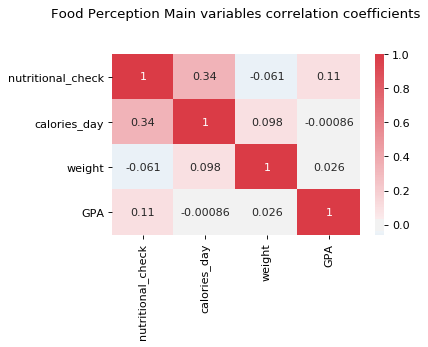

In [27]:
# Store figs for garbage collection later
corr_figs = []

# Plot corr coeff heatmap for just our main variables
main_corrs = FP_df[['nutritional_check', 'calories_day', 'weight', 'GPA']].corr()
corr_figs.append(plt.figure(figsize=(5, 3), dpi=80))
plt.title("Food Perception Main variables correlation coefficients\n\n")
heatmap(
    main_corrs,
    center=0.0,
    cmap=diverging_palette(240, 10, as_cmap=True),
    annot=True)
plt.show()

We can immediately notice that ones perception of the importance of consuming calories in a day is quite postively related to how often the students check the nutritional content on the food that they consume. This shows that students who are more aware and conscious about their health are naturally disposed to check nutritional facts and consume a balanced meal in order to keep their health in check. The coefficients of GPA shows that it does not have a positive or negative relationship with them revealing how it is not affected by those factors significantly.


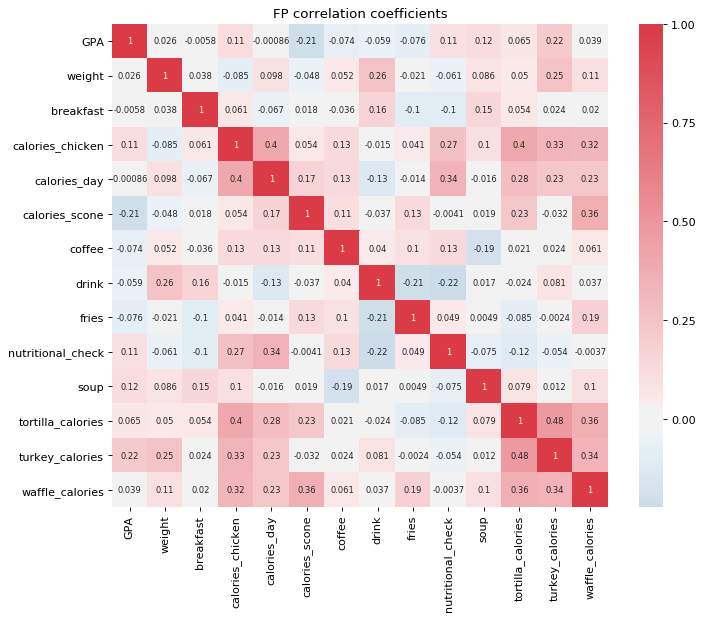

In [28]:
# Plot corr coeff heatmap for Food Perception
FP_corrs = FP_df.corr()
corr_figs.append(plt.figure(figsize=(10, 8), dpi=80))
plt.title("FP correlation coefficients")
heatmap(
    FP_corrs,
    annot_kws={"size": 7.5},
    center=0.0,
    cmap=diverging_palette(240, 10, as_cmap=True),
    annot=True)
plt.show()

* `nutritional_check` versus `GPA`  

Somewhat interestingly, the correlation coefficient matrix plot reveals some interesting facts that counter-intuituvelty contradict our original prediction that good/high GPA would be significantly related to having good hygiene and dietary habits outside class. 

One would naturally tend to lean towards the assumption that high performing students are very particular about their dietary choices but the correlation present in 'nutritional_check' and 'GPA' seems to say otherwise. While this does not show that having bad dietary habits deter ones growth and academic performance, this does not necessarily reveal any further information about the two factors playing a role in a students life.


In [29]:
# Free up memory after plotting
for fig in corr_figs: plt.close(fig)

### Creating SVM Models for our data

We can leverage the richness of our features by employing a machine learning model to analyze our data!  
Here we use a Count Vectorizer to turn our natural language features into a sparse vector representation, which lets us use it in our machine learning model.

In [30]:
#NLP Count Vectorizer
hm_vec = CountVectorizer(analyzer='word', max_features=2000, tokenizer=word_tokenize, stop_words= stopwords.words('english'))
healthy_meal_vector = hm_vec.fit_transform(FP_df["healthy_meal"])

fp_vec = CountVectorizer(analyzer='word', max_features=2000, tokenizer=word_tokenize, stop_words= stopwords.words('english'))
father_profession = fp_vec.fit_transform(QOFL_df["father_profession"])

mp_vec = CountVectorizer(analyzer='word', max_features=2000, tokenizer=word_tokenize, stop_words= stopwords.words('english'))
mother_profession = mp_vec.fit_transform(QOFL_df["mother_profession"])

##### Quality of Life SVM Model

In [31]:
# Sklearn model
# TODO Harsh

def train_SVM(X, y, kernel='linear'):
    clf = SVC(kernel=kernel)
    clf.fit(X,y)
    return clf

def conv_label(gpa):
    return int(gpa)

# Quality of Life Features 
QOFL_dfm = QOFL_df.copy()
fp = pd.DataFrame(father_profession.toarray(), columns = fp_vec.get_feature_names())
mp = pd.DataFrame(mother_profession.toarray(), columns = mp_vec.get_feature_names())
QOFL_dfm = pd.concat([QOFL_dfm, fp,mp], axis=1)
QOFL_dfm = QOFL_dfm.dropna(axis=0)

QOFL_df_X = QOFL_dfm[['life_rewarding', 'weight', 'employment', 'father_education', 'mother_education', 'healthy_feeling', 'self_perception_weight', 'income']]

# Quality of Life Label
QOFL_df_y = QOFL_dfm['GPA'].apply(conv_label)

#QOFL_df_clean = ~QOFL_df_X.isnull()
#QOFL_df_clean

In [32]:
QOFL_X_train, QOFL_X_test, QOFL_y_train, QOFL_y_test = train_test_split(QOFL_df_X, QOFL_df_y, test_size=0.2, random_state=12) 
QOFL_clf = train_SVM(QOFL_X_train, QOFL_y_train)
QOFL_predicted_train_y = QOFL_clf.predict(QOFL_X_train)
QOFL_predicted_test_y = QOFL_clf.predict(QOFL_X_test)

In [33]:
#Training Accuracy
print(classification_report(QOFL_y_train, QOFL_predicted_train_y))

             precision    recall  f1-score   support

          2       0.00      0.00      0.00         8
          3       0.83      1.00      0.91        59
          4       0.00      0.00      0.00         4

avg / total       0.69      0.83      0.75        71



We see in general that our training F1-score is about 75% after training on 80% of the QOFL dataframe

In [34]:
#Testing Accuracy
print(classification_report(QOFL_y_test, QOFL_predicted_test_y))

             precision    recall  f1-score   support

          2       0.00      0.00      0.00         1
          3       0.94      1.00      0.97        17

avg / total       0.89      0.94      0.92        18



We see in general that our testing F1-score is about 92% after testing on 20% of the QOFL dataframe

The linear SVM model we have created allows us to better identify and determine a student's GPA given data about their employment, the education levels of their father and mother, how healthy they perceive to be as well as what they feel about their weight, and their income.

##### Eating Habits SVM Model

In [35]:
# Eating Habits Features
EH_dfm = EH_df.copy()
EH_dfm = EH_dfm.dropna(axis=0)
EH_df_X = EH_dfm[["weight", "life_rewarding", "cook", "cuisine", "diet_current_coded", "eating_out", "fav_food", "fruit_day", "veggies_day", "vitamins", "greek_food", "indian_food", "persian_food", "thai_food"]]

# Eating Habits Label
EH_df_y = EH_dfm['GPA'].apply(conv_label)


In [36]:
EH_X_train, EH_X_test, EH_y_train, EH_y_test = train_test_split(EH_df_X, EH_df_y, test_size=0.2, random_state=12) 

EH_clf = train_SVM(EH_X_train, EH_y_train)
EH_predicted_train_y = EH_clf.predict(EH_X_train)
EH_predicted_test_y = EH_clf.predict(EH_X_test)

In [37]:
#Training Accuracy
print(classification_report(EH_y_train, EH_predicted_train_y))

             precision    recall  f1-score   support

          2       1.00      0.29      0.44         7
          3       0.89      1.00      0.94        68
          4       0.00      0.00      0.00         3

avg / total       0.87      0.90      0.86        78



We see in general that our training F1-Score is about 86% after training on 80% of the QOFL dataframe

In [38]:
#Testing Accuracy
print(classification_report(EH_y_test, EH_predicted_test_y))

             precision    recall  f1-score   support

          2       0.00      0.00      0.00         2
          3       0.90      1.00      0.95        18

avg / total       0.81      0.90      0.85        20



We see in general that our testing F1-Score is about 85%, given we are testing on 20% of the QOFL dataframe

The linear SVM model we have created allows us to better identify and determine a student's GPA given data about their favorite foods, how often they eat out, amounts of fruits and vegetables they consume in a day, etc.

##### Food Perception SVM Model

In [39]:
# Food Perception Features
FP_dfm = FP_df.copy()
hm = pd.DataFrame(healthy_meal_vector.toarray(), columns = hm_vec.get_feature_names())
FP_dfm = pd.concat([FP_dfm, hm], axis=1)
FP_dfm = FP_dfm.dropna(axis=0)
FP_df_X = FP_dfm[["weight", "breakfast", "calories_chicken", "calories_day", "calories_scone", "coffee", "drink", "fries", "nutritional_check","soup", "tortilla_calories", "turkey_calories", "waffle_calories"]]

# Quality of Life Label
FP_df_y = FP_dfm['GPA'].apply(conv_label)

In [40]:
FP_X_train, FP_X_test, FP_y_train, FP_y_test = train_test_split(FP_df_X, FP_df_y, test_size=0.2, random_state=12) 

FP_clf = train_SVM(FP_X_train, FP_y_train)
FP_predicted_train_y = FP_clf.predict(FP_X_train)
FP_predicted_test_y = FP_clf.predict(FP_X_test)

In [41]:
#Training Accuracy
print(classification_report(FP_y_train, FP_predicted_train_y))

             precision    recall  f1-score   support

          2       1.00      0.14      0.25         7
          3       0.90      1.00      0.95        56
          4       1.00      1.00      1.00         1

avg / total       0.92      0.91      0.87        64



We see in general that our training F1-Score is about 87%, given we are training on 80% of the QOFL dataframe

In [42]:
#Testing Accuracy
print(classification_report(FP_y_test, FP_predicted_test_y))

             precision    recall  f1-score   support

          2       0.00      0.00      0.00         0
          3       0.86      0.86      0.86        14
          4       0.00      0.00      0.00         2

avg / total       0.75      0.75      0.75        16



We see in general that our testing F1-Score is about 75%, given we are testing on 20% of the QOFL dataframe

The linear SVM model we have created allows us to better identify and determine a student's GPA given data about their perceptions about different kinds of food with the amounts of calories they contain, as well what they consider to be breakfast, a drink, etc. 

Overall our model in all our cases performs well in predicting a student's GPA given the features provided with our dataset. This is mainly due to the fact that we have such a feature-rich dataset, which gives the SVM lots of information to work with. However, due to our small dataset, we should still be wary of overfitting issues.

### Hypothesis tests on Correlation Coefficients

Before using our Pearson correlation coefficients in any analysis, we must first validate that they are statistically significant by comparing the p-vals to our chosen significance level of 0.05.


Null Hypothesis: Our pearson correlation coefficent = 0. (**Life_rewarding, Healthy_feeling**)

Alternative: Our pearson correlation coefficient is not equal to 0.

Significance Level: alpha = 0.05

In [43]:
r_val = stats.pearsonr(QOFL_dfm['life_rewarding'],QOFL_dfm['healthy_feeling'])[0]
print(r_val)
p_val = stats.pearsonr(QOFL_dfm['life_rewarding'],QOFL_dfm['healthy_feeling'])[1]
print(p_val)

0.6873041221421216
1.0214474719610382e-13


Since our p-value (1.0214474719610382e-13) is less than our significance level alpha = 0.05, we can reject the null hypothesis and we can conclude there is some form of correlation between a student's perception of how healthy they feel and how rewarding they believe their life to be.

Null Hypothesis: Our pearson correlation coefficent = 0 (**Self_perception_weight, Exercise**)

Alternative: Our pearson correlation coefficient is not equal to 0.

Significance Level: alpha = 0.05

In [44]:
r_val = stats.pearsonr(QOFL_dfm['self_perception_weight'],QOFL_dfm['exercise'])[0]
print(r_val)
p_val = stats.pearsonr(QOFL_dfm['self_perception_weight'],QOFL_dfm['exercise'])[1]
print(p_val)

0.36491863958315046
0.0004380338717511757


Since our p-value (0.0004380338717511757) is less than our significance level alpha = 0.05, we can reject the null hypothesis and we can conclude there is some form of correlation between a student's perception on their weight and how much they feel they exercise.

Null Hypothesis: Our pearson correlation coefficent = 0 (**Income, Father_education**)

Alternative: Our pearson correlation coefficient is not equal to 0.

Significance Level: alpha = 0.05

In [45]:
r_val = stats.pearsonr(QOFL_dfm['income'],QOFL_dfm['father_education'])[0]
print(r_val)
p_val = stats.pearsonr(QOFL_dfm['income'],QOFL_dfm['father_education'])[1]
print(p_val)

0.3725733578925101
0.00032373664172533995


Since our p-value (0.00032373664172533995) is less than our significance level alpha = 0.05, we can reject the null hypothesis and we can conclude there is some form of correlation between a student's income on their weight and the education of their parents

Null Hypothesis: Our pearson correlation coefficent = 0 (** Veggies_day, Fav_food **)

Alternative: Our pearson correlation coefficient is not equal to 0.

Significance Level: alpha = 0.05

In [46]:
r_val = stats.pearsonr(EH_dfm['veggies_day'],EH_dfm['fav_food'])[0]
print(r_val)
p_val = stats.pearsonr(EH_dfm['veggies_day'],EH_dfm['fav_food'])[1]
print(p_val)

-0.30661970385306553
0.002135155541917672


Since our p-value (0.002135155541917672) is less than our significance level alpha = 0.05, we can reject the null hypothesis and we can conclude there is some form of correlation between the amount of veggies consumed in a day by a student and their favorite kind of food

Null Hypothesis: Our pearson correlation coefficent = 0 (** Veggies_day, Fruit_day **)

Alternative: Our pearson correlation coefficient is not equal to 0.

Significance Level: alpha = 0.05

In [47]:
r_val = stats.pearsonr(EH_dfm['veggies_day'],EH_dfm['fruit_day'])[0]
print(r_val)
p_val = stats.pearsonr(EH_dfm['veggies_day'],EH_dfm['fruit_day'])[1]
print(p_val)

0.6348393413198098
2.2218088613450155e-12


Since our p-value (2.2218088613450155e-12) is less than our significance level alpha = 0.05, we can reject the null hypothesis and we can conclude there is some form of correlation between the amount of veggies consumed in a day and amount of fruit consumed in a day

Null Hypothesis: Our pearson correlation coefficent = 0 (**Nutritional_check, GPA**)

Alternative: Our pearson correlation coefficient is not equal to 0.

Significance Level: alpha = 0.05

In [48]:
r_val = stats.pearsonr(FP_dfm['nutritional_check'],FP_dfm['GPA'])[0]
print(r_val)
p_val = stats.pearsonr(FP_dfm['nutritional_check'],FP_dfm['GPA'])[1]
print(p_val)

0.12726639575003657
0.2606010857437226


Since our p-value (0.2602812706269286) is greater than our significance level alpha = 0.05, we fail to reject the null hypothesis and we can conclude there is no form of correlation between how often a student checks the nutritonal facts on food that they eat and their overall performance in school measured by GPA.

## Ethics and Privacy (15%)

<h3>Ethics in this study</h3>
    <p>The goal of this study is to better understand the relationship between health and performance of college students given the information obtained from a short survey. While we have not collected the data ourselves, it is still our duty to exercise care in handling the data in a way that protects the ones who have volunteered to provide the desired information in the first place.</p>
    <p>The first ethical consideration is the analysis of risk/reward regarding the collection and interpretation of data. Despite the limited amount of data, we do not believe that this survey catered only to those who participated, due to the nature of the questions. Ultimately, gathering nutrition information on college students can serve a range of purposes, but in this case, we are looking to establish ways where we can limit the risks and focus on the rewards.</p>
    <p>In that sense, we can consider the ethics of accuracy in this study. If there is, indeed, a correlation between healthy eating habits and improved academic performance, we can use that information to get a conversation started aiming to make healthy food offerings the standard around campuses. If the interpretation of the data here provided reflects the picture of multiple colleges and indeed serves to enact such policies, we believe that this is indeed a benefit to all students. There are still risks, especially if the data is not representative of most colleges, that this data might cause harm instead of good. For example, a college could raise tuition to pay for the healthier food options. Still, we believe that this risk is minimized because, even in that scenario, one could argue that the health care savings originated from better eating offset the higher tuition costs.</p>
    <p>Another consideration we have to make is if this study is going to result in any discrimination. Would any overweight student at a college suddenly be deemed less intelligent? Would it cause an employer to pick a lean candidate over an overweight one? We do not believe that our study would cause people to classify lean and overweight people as smart and non-smart, simply because there are many causes to being lean or overweight besides what goes in someone's plate. While we could establish a contributory relationship between being healthy and having better academic  performance, we can not assert that being unhealthy <em>causes</em> poor performance.</p>
    <hr/>
<h3>Privacy considerations</h3>
    <p>We, as data scientists, must exercise care when handling data. One of our biggest concerns is to ensure to protect the privacy of those who volunteered to provide the data. Whenever possible, we want to anonymize sensitive data, following the Safe Harbor guidelines where appropriate. We do not want our data to be a risk as we have discussed in the <em>Ethics</em> section above.  The considerations we have taken are listed, in summary, below:</p>
    <p>The first issue we found is that our dataset is taken from students in a private college located in Erie, PA. The city's population is around 100,000, and the college has approximately 3000 students, out of which 126 (.04%) provided responses. It is important to remove any unique information that, combined with other information about the students of this college, might be able to identify them.</p>
    <p>With that in mind, we analyzed our data and found that most of the information contained in the dataset is very general. It does not really contain any addresses, DOBs, names, documents, or other information that is directly identifiable. Many of the columns contain potentially marketable information, but not really identifiable. Others might be identifiable, such as weight or GPA, but they both tend to be variable. Additionally, GPA is protected under <a href="https://www2.ed.gov/policy/gen/guid/fpco/ferpa/index.html">FERPA law</a>, so we did not believe they needed to be removed or masked. Still, we found that the parents' profession columns might need attention.</p>
    <p>The question regarding father or mother's profession was open-ended, which elicited students to be as loose or specific in their answering as possible. We wanted to limit the ability of anyone to search for, as an example, a male whose father is a VP of a pharma company. So, we standardized as much as possible the professions listed in either father or mother columns, such that the profession is listed in a much more general way, making it difficult to identify who the potential student was. If the profession was deemed to specific, we simply listed it as "other," since those columns were useful, but not vital for the data analysis.
    <hr/>
    <p>Ultimately, we believe we carefully analyzed and handled our data in a way that respects that the individuals who were gentle enough to provide it in the first place. As scientists, we need to convey the information from our studies in a way that protects people who are directly or indirectly involved. As a result, we analyzed issues of risk/reward, accuracy, discrimination, and privacy. We believe that taking those steps is a fundamental part of any study concerning people's data.</p>

## Conclusions and Discussion

### Conclusion
The major takeaway from our study is that through a thorough analysis of our dataset, we are able to categorically reject the first half of our 2-part hypothesis and accept the second half!  

To recap, our hypothesis is as follows: _We hypothesize that students who tend to favor healthier food choices will likely perform better than those who do not. Furthermore, we believe that those who self-report as happy, well-adjusted individuals will be more likely to have a healthier diet._

Our multi-part hypothesis asserts that 
1. Students who eat healthier will have higher GPAs than those who don't.
2. Students that percieve their own lives as fulfilling will be more likely to be healthy.  

Let's break down both assertions in turn.

#### 1) Students who eat healthier will have higher GPAs than those who don't. (Rejected)
As we have seen in the Analysis section, we are unable to find any statistically significant correlation between `healthy_feeling` and `GPA`, nor could we find one between `weight` and `GPA`. The Pearson correlation coefficient between `healthy_feeling` and `GPA` was calculated to be -0.044, and between `weight` and `GPA` was calculated to be -0.041, both of which are extremely close to zero, indicating that no such correlation exists, positive or negative. However, while Pearson corr-coeff couldn't find any relationship here, it is worth mentioning the some interesting facts about our data that relate to these variables. Of the few outliers in weight, we see a much lower GPA on average. This is also corroborated by our GPA-binning visualization, which breaks down our main variables by GPA percentiles. The bin for a GPA value in (0 - 2.50] contains only 3 instances, of which all fall in the top 90% percentile for weight. Furthermore, we are able to find a statistically meaningful correlation between `exercise` and `weight`, which, obeying conventional wisdom, insinuates that more exercise is correlated with less weight. When applied to the GPA-bins, we see that the (0 - 2.50] GPA bin contains far more instances of people that do not exercise than those who do. We also tested this observation on our SVM model by fabricating a training sample with low GPA and other variables at their means, and one with high weight and other variables at their means. The model predicted that the high weight sample would have low GPA, but interestingly enough, did _not_ predict that the low GPA sample had high weight. These observations do indeed suggest that higher weight implies a lower GPA, but not very convincingly. Returning to our near-zero Pearson correlation coefficient, **we end up rejecting this part of our hypothesis,** as when looking at the dataset as a whole, there isn't enough statistically significant evidence to assert that a lower weight implies a higher GPA.

#### 2) Students that percieve their own lives as fulfilling will be more likely to be healthy. (Accepted)
This part of the hypothesis is quite interesting, and has several implications. The central variables here in our analysis is `life_rewarding` and `healthy_feeling`. `life_rewarding` describes, on a scale from 0-10, how fulfilling and rewarding one considers their life, while `healthy_feeling` describes, also on a scale from 0-10, how healthy one reports themselves to be. Here we able to find a statistically significant correlation between these two variables, at a very strongly positive value of 0.66. This indicates that those who reported their lives as relatively poorly fulfilling are, more often than not, those who regard themselves as having good health. It also means that those who reported themselves as having poor health are likely those that reported their own lives as unrewarding. From just the correlation coefficient statistic, we are unable to extract a casual relationship, so we cannot report whether a rewarding life leads to good health, or, as conventional wisdom would imply, that good health leads to a rewarding life. However, this is enough to **accept the second part of our hypothesis,** which simply contends that such a correlative relationship does exist. Our SVM model also concurs with this assessment, as when trained on the full feature-rich dataset, with Y=`life_rewarding`, will predict a training sample with low `healthy_feeling`, and all other variables set to their corresponding means in the dataset. 


With this analysis in mind, **we can address our original questions:** a college student's diet and perception of food is **not** telling of their academic performance. However, we found that a healthy diet **is generally associated** with general quality of life.

### Discussion

#### Caveats
There are a few caveats that we must address when validating our hypothesis. The most major one is that our dataset is small, which can lead to overfitting, where a statistical model learns characteristics that are only applicable to a given dataset, but not to other real-world datasets at large. We have taken steps to address the poor generalizability, as outlined in the Analysis and Results section, but a small base dataset is a caveat to consider. Another caveat is that our conclusion does not make any assertions on causal relationships. There is no supporting evidence, for example to show that better health _is a result of_ a rewarding life. This is by design, and is not a flaw in our methodology, but is worth mentioning to prevent misuse of our conclusion.

#### Potential Impact
According to the National Center for Education Statistics (<a href="https://nces.ed.gov/fastfacts/display.asp?id=372">NCES</a>), approximately 20 million students were expected to attend college in Fall 2017. We, as college students, have firsthand experience with how stressful the college environment can be. In such a high pressure environment, we need to find coping mechanisms in order to deal with the academic and personal challenges appropriately, all while trying to eliminate - or at least reduce - the impact in physical and mental health. Considering there are just so many other people out there in the same situation, this study aimed to provide a tangible way to improve the health and overall life of this evergrowing population through the adoption of simple lifestyle changes.
<p>While our main findings did not corroborate the idea that healthier nutrition causes improved academic life, we still believe that this study provides valuable information to those students seeking to balance the pressure of academics, while still being healthy. Knowing that having a fulfilling life is related to healthier students can be important in different levels. On a micro level, a student who knows this information should pursue academics that they find interesting or captivating whenever possible. Faculty can adopt policies to promote students' success. On a macro level, universities can offer additional programs both academic and non-academic, in order to provide an environment where students can feel accomplished, happy, and/or fulfilled. As an example, UCSD's SPIS and Summer Academy programs to incoming freshman and transfer students, respectively, provide a way for students to make friends, meet faculty, learn about the university, and solidify their academic interests. If programs and policies that are student-oriented make their way to universities across the country, we should expect an improvement in student's health - and that matters.</p>